In [4]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
df_feat=pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df_target=pd.DataFrame(cancer['target'], columns=['Cancer'])

In [6]:
#Assignment

In [7]:
#Implement Random Forest with Default Hyperparameter

In [24]:
X=cancer.data
y=cancer.target

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=0)

In [27]:
from pprint import pprint

print('Parameters currently in use with deafult value:\n')
pprint(rf.get_params())

Parameters currently in use with deafult value:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [28]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [12]:
#Answer

In [29]:
from sklearn.metrics import accuracy_score

y_pred=rf.predict(X_test)
print('Test accuracy:', accuracy_score(y_test, y_pred))

Test accuracy: 0.9415204678362573


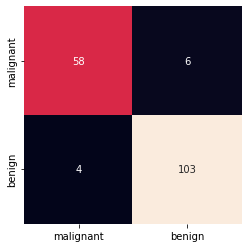

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cmx=confusion_matrix(y_test, y_pred)
df_cmx=pd.DataFrame(cmx, index=cancer.target_names, columns=cancer.target_names)
sns.heatmap(df_cmx, annot=True, cbar=False, square=True, fmt='d')

In [31]:
#Implement Random Forest with Tunned Hyperparameter

In [14]:
X=cancer.data
y=cancer.target

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [16]:
param_grid={
    'bootstrap': [True, False],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [18]:
from sklearn.model_selection import GridSearchCV

rf=RandomForestClassifier()
grid=GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid.fit(X_train, y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [19]:
print(grid.best_params_)
print(grid.best_estimator_)

{'bootstrap': False, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 200}
RandomForestClassifier(bootstrap=False, max_depth=80, max_features=2,
                       min_samples_leaf=4, min_samples_split=8,
                       n_estimators=200)


In [20]:
#Answer

In [21]:
from sklearn.metrics import accuracy_score

y_pred=grid.predict(X_test)
print('Test accuracy:', accuracy_score(y_test, y_pred))

Test accuracy: 0.9415204678362573


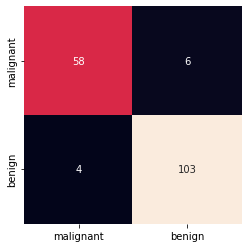

In [22]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

cmx=confusion_matrix(y_test, y_pred)
df_cmx=pd.DataFrame(cmx, index=cancer.target_names, columns=cancer.target_names)
sns.heatmap(df_cmx, annot=True, cbar=False, square=True, fmt='d')